In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
dataset = pd.read_csv('/content/drive/MyDrive/Uber Rides/UberDataset.csv')
dataset.head()


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [3]:
dataset.shape


(1156, 7)

In [4]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [5]:
dataset['PURPOSE'].fillna("NOT", inplace=True)


In [6]:
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'],
									errors='coerce')
dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'],
									errors='coerce')


In [7]:
from datetime import datetime

dataset['date'] = pd.DatetimeIndex(dataset['START_DATE']).date
dataset['time'] = pd.DatetimeIndex(dataset['START_DATE']).hour

#changing into categories of day and night
dataset['day-night'] = pd.cut(x=dataset['time'],
							bins = [0,10,15,19,24],
							labels = ['Morning','Afternoon','Evening','Night'])


In [8]:
dataset.dropna(inplace=True)


In [9]:
dataset.drop_duplicates(inplace=True)


In [10]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)

unique_values = {}
for col in object_cols:
  unique_values[col] = dataset[col].unique().size
unique_values


{'CATEGORY': 2, 'START': 175, 'STOP': 186, 'PURPOSE': 11, 'date': 291}

In [11]:
dataset['PURPOSE'].unique()

array(['Meal/Entertain', 'NOT', 'Errand/Supplies', 'Meeting',
       'Customer Visit', 'Temporary Site', 'Between Offices',
       'Charity ($)', 'Commute', 'Moving', 'Airport/Travel'], dtype=object)

In [12]:
for series in dataset.columns:
  if dataset[series].dtypes == 'object':
    dataset[series] = dataset[series].astype('category')
    dataset[series]  = dataset[series].cat.codes
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,0,52,48,5.1,6,0,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,0,52,48,5.0,9,1,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,0,52,48,4.8,5,1,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,0,52,48,4.7,7,2,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,0,52,179,63.7,4,3,14.0,Afternoon


In [13]:
dataset['PURPOSE'].unique()

array([ 6,  9,  5,  7,  4, 10,  1,  2,  3,  8,  0], dtype=int8)

In [14]:
for series in dataset.columns:
  if dataset[series].dtypes == 'category':
    dataset[series]  = dataset[series].cat.codes
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,0,52,48,5.1,6,0,21.0,3
1,2016-01-02 01:25:00,2016-01-02 01:37:00,0,52,48,5.0,9,1,1.0,0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,0,52,48,4.8,5,1,20.0,3
3,2016-01-05 17:31:00,2016-01-05 17:45:00,0,52,48,4.7,7,2,17.0,2
4,2016-01-06 14:42:00,2016-01-06 15:49:00,0,52,179,63.7,4,3,14.0,1


([<matplotlib.axis.XTick at 0x7d4713f16830>,
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'NOT'),
  Text(2, 0, 'Errand/Supplies'),
  Text(3, 0, 'Meeting'),
  Text(4, 0, 'Customer Visit'),
  Text(5, 0, 'Temporary Site'),
  Text(6, 0, 'Between Offices'),
  Text(7, 0, 'Charity ($)'),
  Text(8, 0, 'Commute'),
  Text(9, 0, 'Moving'),
  Text(10, 0, 'Airport/Travel')])

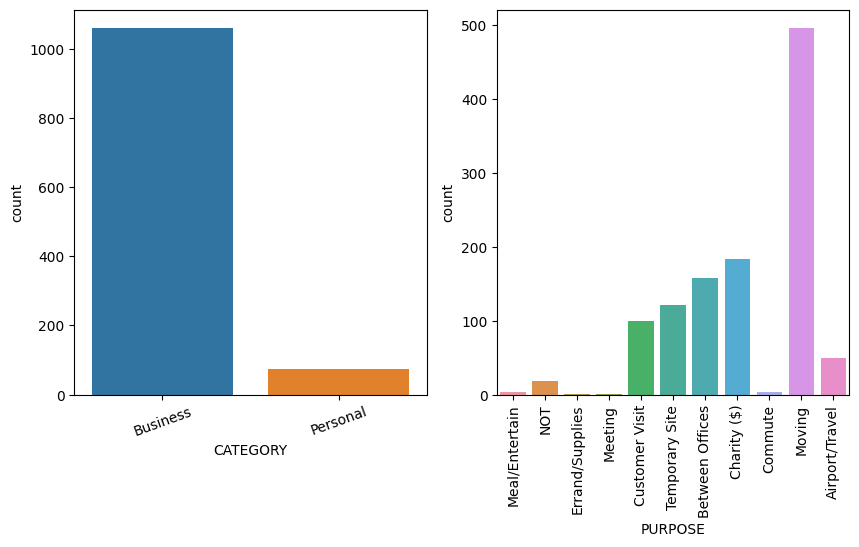

In [20]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(x=dataset['CATEGORY'])
plt.xticks(rotation=90)
locs, labels = plt.xticks()  # Get the current locations and labels.
plt.xticks([0, 1], ['Business', 'Personal'],
       rotation=20)  # Set text labels and properties.

plt.subplot(1,2,2)
sns.countplot(x=dataset['PURPOSE'])
plt.xticks(rotation=90)
locs, labels = plt.xticks()  # Get the current locations and labels.
plt.xticks([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], ['Meal/Entertain', 'NOT', 'Errand/Supplies', 'Meeting',
       'Customer Visit', 'Temporary Site', 'Between Offices',
       'Charity ($)', 'Commute', 'Moving', 'Airport/Travel'],
       rotation=90)  # Set text labels and properties.

([<matplotlib.axis.XTick at 0x7d47145da1a0>,
 [Text(0, 0, 'Morning'),
  Text(1, 0, 'Afternoon'),
  Text(2, 0, 'Evening'),
  Text(3, 0, 'Night')])

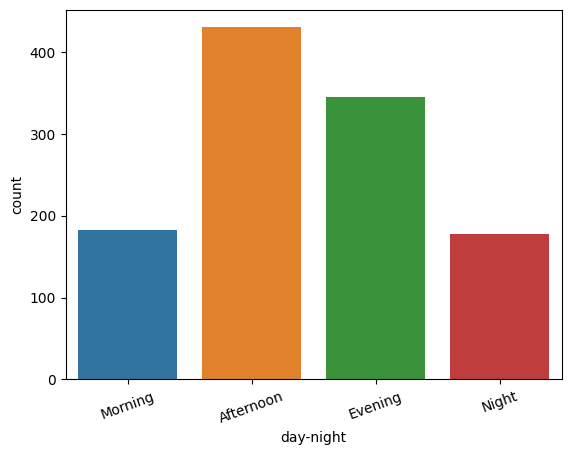

In [16]:
sns.countplot(x=dataset['day-night'])
plt.xticks(rotation=90)

locs, labels = plt.xticks()  # Get the current locations and labels.
plt.xticks([0, 1, 2, 3], ['Morning', 'Afternoon', 'Evening', 'Night'],
       rotation=20)  # Set text labels and properties.
#plt.xticks([])  # Disable xticks.

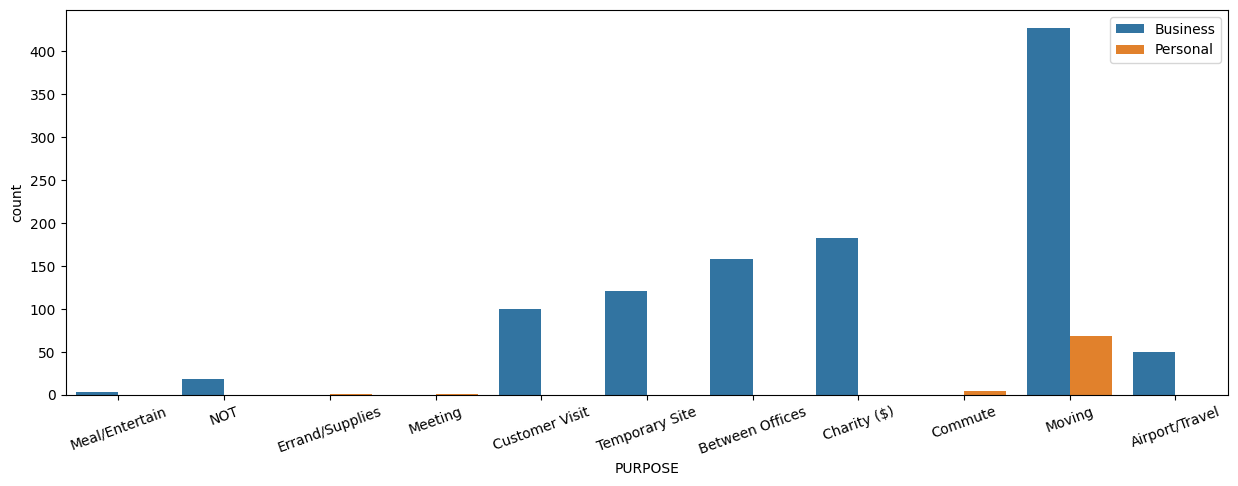

In [23]:
plt.figure(figsize=(15, 5))
sns.countplot(data=dataset, x='PURPOSE', hue='CATEGORY')
plt.xticks(rotation=90)
locs, labels = plt.xticks()  # Get the current locations and labels.
plt.xticks([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], ['Meal/Entertain', 'NOT', 'Errand/Supplies', 'Meeting',
       'Customer Visit', 'Temporary Site', 'Between Offices',
       'Charity ($)', 'Commute', 'Moving', 'Airport/Travel'],
       rotation=20)
plt.legend(labels=['Business', 'Personal'])

plt.show()

In [26]:
from sklearn.preprocessing import OneHotEncoder
object_cols = ['CATEGORY', 'PURPOSE']
OH_encoder = OneHotEncoder(sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(dataset[object_cols]))
OH_cols.index = dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = dataset.drop(object_cols, axis=1)
dataset = pd.concat([df_final, OH_cols], axis=1)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


<ipython-input-32-8059c3174e7c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(),


<Axes: >

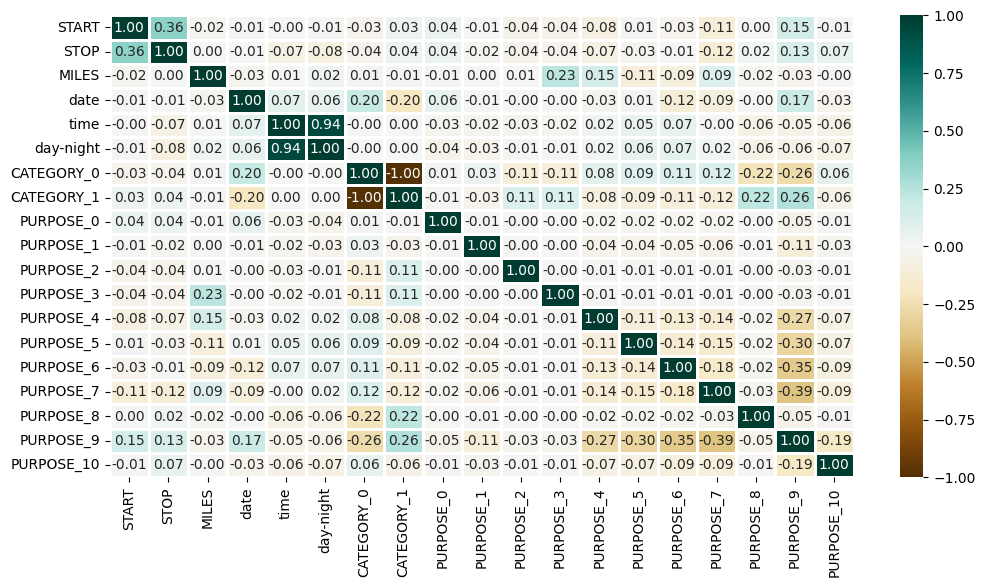

In [32]:
plt.figure(figsize=(12, 6))
sns.heatmap(dataset.corr(),
			cmap='BrBG',
			fmt='.2f',
			linewidths=2,
			annot=True)



[Text(0.5, 0, 'MONTHS'), Text(0, 0.5, 'VALUE COUNT')]

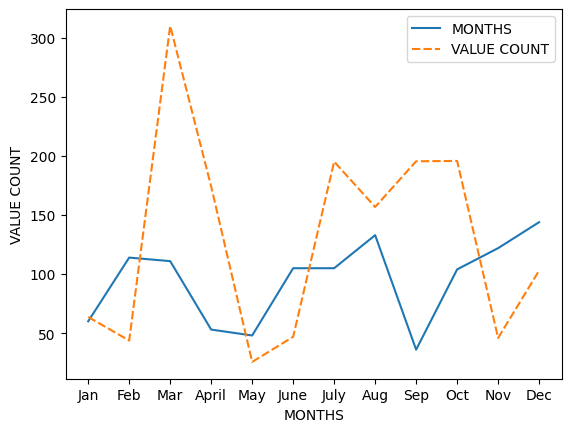

In [33]:
dataset['MONTH'] = pd.DatetimeIndex(dataset['START_DATE']).month
month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April',
			5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Aug',
			9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}
dataset["MONTH"] = dataset.MONTH.map(month_label)

mon = dataset.MONTH.value_counts(sort=False)

# Month total rides count vs Month ride max count
df = pd.DataFrame({"MONTHS": mon.values,
				"VALUE COUNT": dataset.groupby('MONTH',
												sort=False)['MILES'].max()})

p = sns.lineplot(data=df)
p.set(xlabel="MONTHS", ylabel="VALUE COUNT")


In [34]:
dataset['DAY'] = dataset.START_DATE.dt.weekday
day_label = {
	0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus', 4: 'Fri', 5: 'Sat', 6: 'Sun'
}
dataset['DAY'] = dataset['DAY'].map(day_label)


Text(0, 0.5, 'COUNT')

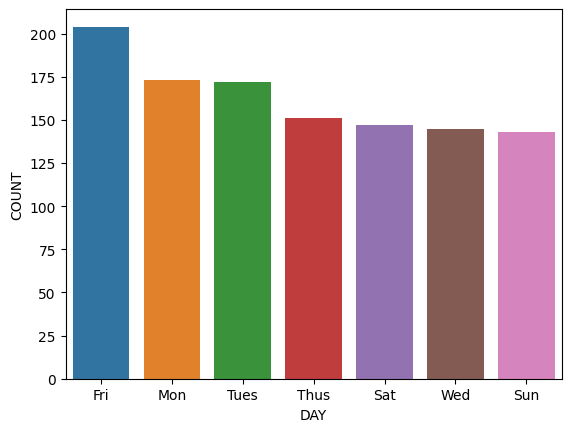

In [35]:
day_label = dataset.DAY.value_counts()
sns.barplot(x=day_label.index, y=day_label);
plt.xlabel('DAY')
plt.ylabel('COUNT')


(array([0]), [Text(0, 0, '0')])

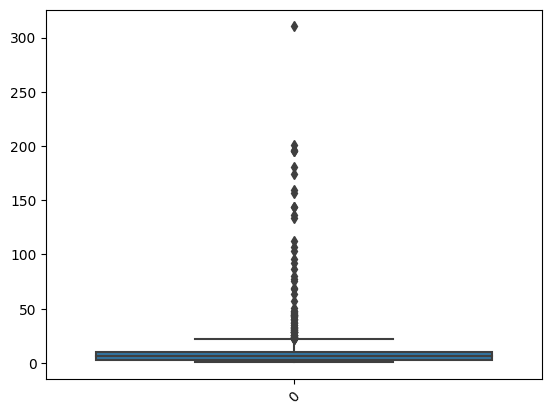

In [37]:
sns.boxplot(dataset['MILES'])

<ipython-input-39-1d5904d4eb1d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[dataset['MILES']<40]['MILES'])


<Axes: xlabel='MILES', ylabel='Density'>

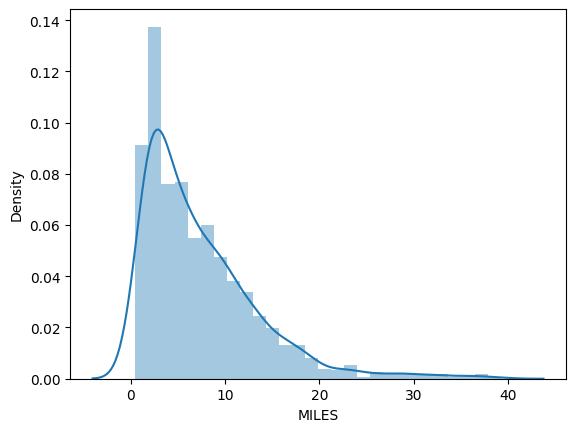

In [39]:
sns.distplot(dataset[dataset['MILES']<40]['MILES'])